In [3]:
import os
import sys
from datasets import load_dataset
from pathlib import Path

# --- 1. RESOLVE WINDOWS DLL ISSUE (FFMPEG FIX) ---
# Use the path you just found from the WinGet installation
ffmpeg_bin_path = r"C:\Users\USER\AppData\Local\Microsoft\WinGet\Packages\Gyan.FFmpeg_Microsoft.Winget.Source_8wekyb3d8bbwe\ffmpeg-8.0.1-full_build\bin" 

if os.path.exists(ffmpeg_bin_path):
    # This command is critical for Python 3.8+ on Windows to find the DLLs
    os.add_dll_directory(ffmpeg_bin_path)
    print(f" FFmpeg DLL search path successfully added: {ffmpeg_bin_path}")
else:
    # If the path is wrong, we stop here.
    sys.exit(f" FATAL: FFmpeg bin path not found at {ffmpeg_bin_path}.")

# --- 2. ENFORCE E: DRIVE CACHE LOCATION ---
# We use the explicit cache_dir to ensure the download goes to E: Drive
DATASET_CACHE_DIR = Path(r"E:\DeepLearningSwahili\dataset_cache") 
DATASET_CACHE_DIR.mkdir(parents=True, exist_ok=True)

# --- 3. LOAD THE DATASET ---
print("Attempting to load dataset...")

try:
    ds = load_dataset(
        "michsethowusu/swahili-words-speech-text-parallel",
        cache_dir=str(DATASET_CACHE_DIR) # Force the E: drive path
    )
    print("\n Dataset loaded successfully! The dependency chain is complete!")

    # Verify that we have the train split and its size
    print(f"Dataset Loaded: {ds}")
    
except Exception as e:
    print(f"\n A persistent error occurred: {e}")

 FFmpeg DLL search path successfully added: C:\Users\USER\AppData\Local\Microsoft\WinGet\Packages\Gyan.FFmpeg_Microsoft.Winget.Source_8wekyb3d8bbwe\ffmpeg-8.0.1-full_build\bin
Attempting to load dataset...

 Dataset loaded successfully! The dependency chain is complete!
Dataset Loaded: DatasetDict({
    train: Dataset({
        features: ['audio', 'text'],
        num_rows: 411048
    })
})


In [30]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import os
import sys
from pathlib import Path
from datasets import load_dataset



In [3]:

# --- 1. CRITICAL FFMPEG PATH FIX ---
ffmpeg_bin_path = r"C:\Users\USER\AppData\Local\Microsoft\WinGet\Packages\Gyan.FFmpeg_Microsoft.Winget.Source_8wekyb3d8bbwe\ffmpeg-8.0.1-full_build\bin" 

if os.path.exists(ffmpeg_bin_path):
    # This must run before torchcodec is implicitly loaded!
    os.add_dll_directory(ffmpeg_bin_path)
    print(f"✅ FFmpeg DLL search path successfully added: {ffmpeg_bin_path}")
else:
    sys.exit(f"🛑 FATAL: FFmpeg bin path not found at {ffmpeg_bin_path}.")

# --- 2. LOAD DATASET (This requires the fix above) ---
DATASET_CACHE_DIR = Path(r"E:\DeepLearningSwahili\dataset_cache") 
print("\nAttempting to load dataset...")

try:
    ds = load_dataset(
        "michsethowusu/swahili-words-speech-text-parallel",
        cache_dir=str(DATASET_CACHE_DIR) 
    )
    print("Dataset loaded successfully!")
    
except Exception as e:
    sys.exit(f"\n A persistent error occurred during load: {e}")

# --- 3. VIEW SAMPLE (This accesses the audio and requires the fix) ---
sample = ds['train'][0]

print("\n-------------------------------------------")
print("First sample from the training set:")
print(sample)
print("\nAudio feature of the first sample:")
# Accessing 'array' here triggers the successful decoding!
print(f"Sampling Rate: {sample['audio']['sampling_rate']}")
print(f"Waveform Shape: {sample['audio']['array'].shape}")
print("\nText feature of the first sample:")
print(sample['text'])

'(MaxRetryError('HTTPSConnectionPool(host=\'huggingface.co\', port=443): Max retries exceeded with url: /datasets/michsethowusu/swahili-words-speech-text-parallel/resolve/main/README.md (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x0000022349BF0070>: Failed to resolve \'huggingface.co\' ([Errno 11001] getaddrinfo failed)"))'), '(Request ID: 1d62a15e-b9b7-4899-890b-298d2e82c82b)')' thrown while requesting HEAD https://huggingface.co/datasets/michsethowusu/swahili-words-speech-text-parallel/resolve/main/README.md
Retrying in 1s [Retry 1/5].


✅ FFmpeg DLL search path successfully added: C:\Users\USER\AppData\Local\Microsoft\WinGet\Packages\Gyan.FFmpeg_Microsoft.Winget.Source_8wekyb3d8bbwe\ffmpeg-8.0.1-full_build\bin

Attempting to load dataset...


'(MaxRetryError('HTTPSConnectionPool(host=\'huggingface.co\', port=443): Max retries exceeded with url: /datasets/michsethowusu/swahili-words-speech-text-parallel/resolve/main/README.md (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x0000022349BF0EB0>: Failed to resolve \'huggingface.co\' ([Errno 11001] getaddrinfo failed)"))'), '(Request ID: eff6bf6d-7280-411b-898a-6f7c3f281e30)')' thrown while requesting HEAD https://huggingface.co/datasets/michsethowusu/swahili-words-speech-text-parallel/resolve/main/README.md
Retrying in 2s [Retry 2/5].
'(MaxRetryError('HTTPSConnectionPool(host=\'huggingface.co\', port=443): Max retries exceeded with url: /datasets/michsethowusu/swahili-words-speech-text-parallel/resolve/main/README.md (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x0000022349BF3CD0>: Failed to resolve \'huggingface.co\' ([Errno 11001] getaddrinfo failed)"))'), '(Request ID: ab7664ed-1928-4a6b-9ee6-dcbcd9e2fb2c)')' thr

Dataset loaded successfully!

-------------------------------------------
First sample from the training set:
{'audio': {'path': '171_na.wav', 'array': array([0., 0., 0., ..., 0., 0., 0.]), 'sampling_rate': 16000}, 'text': 'na'}

Audio feature of the first sample:
Sampling Rate: 16000
Waveform Shape: (5436,)

Text feature of the first sample:
na


In [5]:
def get_audio_duration(sample):
    audio_array = sample['audio']['array']
    sampling_rate = sample['audio']['sampling_rate']
    return librosa.get_duration(y=audio_array, sr=sampling_rate)

# Calculate durations for the first 5000 samples
num_samples_to_check = 5000
durations = []

print(f"Calculating durations for the first {num_samples_to_check} samples...")
for i in range(num_samples_to_check):
    sample = ds['train'][i]
    duration = get_audio_duration(sample)
    durations.append(duration)

print("Durations calculated successfully.")

Calculating durations for the first 5000 samples...
Durations calculated successfully.


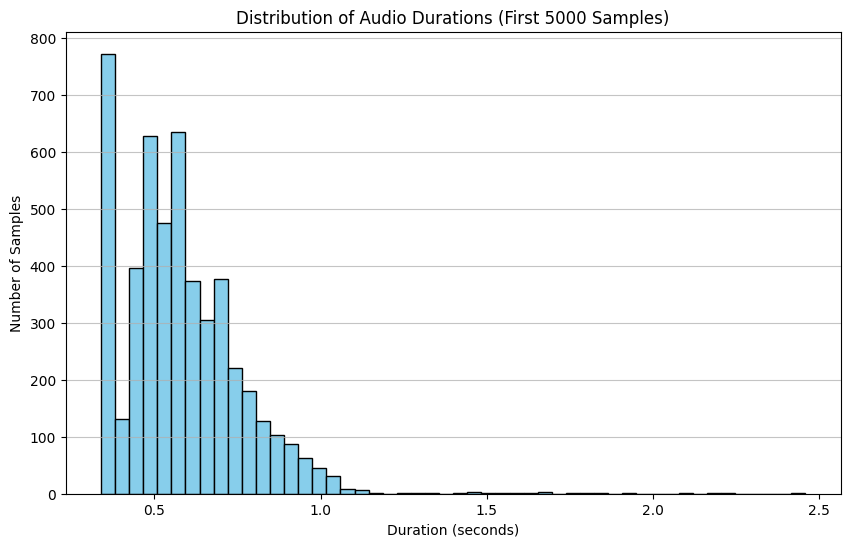

In [6]:
plt.figure(figsize=(10, 6))
plt.hist(durations, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Audio Durations (First 5000 Samples)')
plt.xlabel('Duration (seconds)')
plt.ylabel('Number of Samples')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [7]:
all_labels = [sample['text'] for sample in ds['train']]
word_counts = Counter(all_labels)

print("Top 10 most frequent words (labels):")
for word, count in word_counts.most_common(10):
    print(f"'{word}': {count}")

Top 10 most frequent words (labels):
'na': 23933
'kwa': 10991
'ya': 9578
'wa': 6764
'katika': 5831
'bwana': 5371
'yake': 3561
'mungu': 3410
'ni': 3218
'watu': 3021


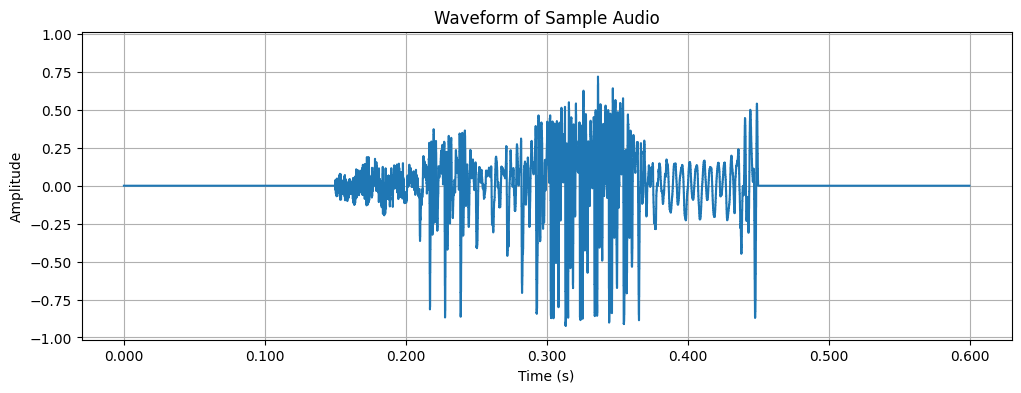

In [8]:
audio_array = sample['audio']['array']
sampling_rate = sample['audio']['sampling_rate']

plt.figure(figsize=(12, 4))
librosa.display.waveshow(y=audio_array, sr=sampling_rate)
plt.title('Waveform of Sample Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

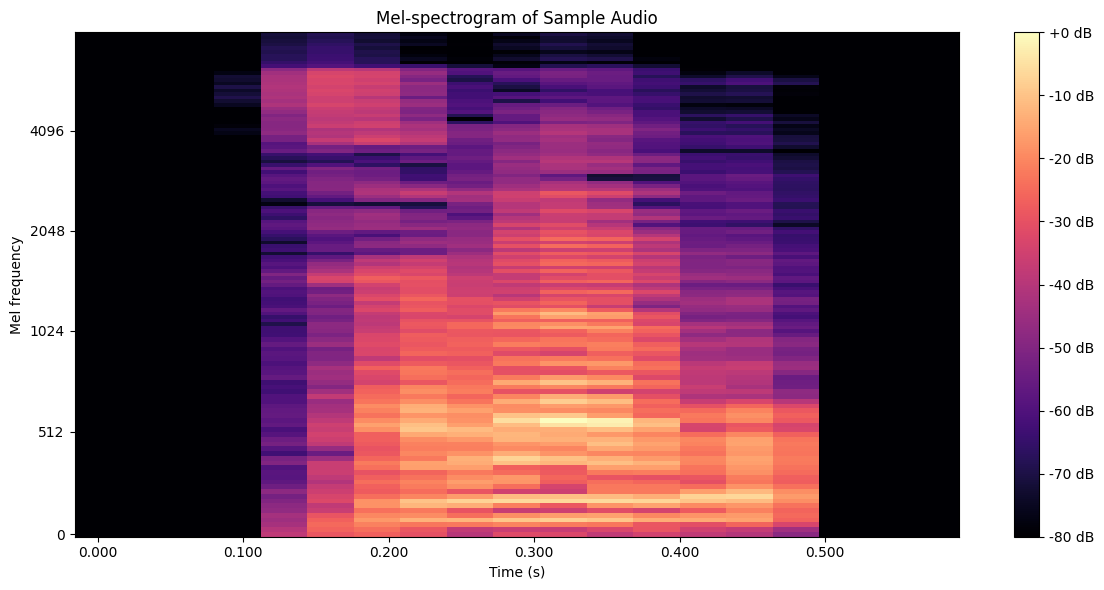

In [9]:
mel_spectrogram = librosa.feature.melspectrogram(y=audio_array, sr=sampling_rate)
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

plt.figure(figsize=(12, 6))
librosa.display.specshow(mel_spectrogram_db, sr=sampling_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-spectrogram of Sample Audio')
plt.xlabel('Time (s)')
plt.ylabel('Mel frequency')
plt.tight_layout()
plt.show()

In [10]:
def augment_audio(audio_array, sampling_rate):
    # Randomly choose between noise injection and pitch shifting
    augmentation_type = np.random.choice(['noise', 'pitch_shift', 'none'])

    if augmentation_type == 'noise':
        # Noise Injection
        noise_amplitude = 0.005 * np.random.uniform(0.5, 1.5)
        noise = np.random.randn(len(audio_array)).astype(audio_array.dtype) * noise_amplitude
        augmented_audio = audio_array + noise
        # Clip to maintain audio range (e.g., -1 to 1 for float audio)
        augmented_audio = np.clip(augmented_audio, -1.0, 1.0)

    elif augmentation_type == 'pitch_shift':
        # Pitch Shifting
        n_steps = np.random.uniform(-2, 2)  # Shift by -2 to +2 semitones
        augmented_audio = librosa.effects.pitch_shift(y=audio_array, sr=sampling_rate, n_steps=n_steps)

    else:
        augmented_audio = audio_array

    return augmented_audio

print("Defined augment_audio function.")

Defined augment_audio function.


In [11]:
def extract_features(audio_array, sampling_rate, n_mels=128):
    # Calculate Mel-spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=audio_array, sr=sampling_rate, n_mels=n_mels)
    # Convert to decibels
    mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
    return mel_spectrogram_db

print("Defined extract_features function.")

Defined extract_features function.


In [12]:
def preprocess_sample(sample, target_length_frames=100, apply_augmentation=True, n_mels=128):
    audio_array = sample['audio']['array']
    sampling_rate = sample['audio']['sampling_rate']

    if apply_augmentation:
        audio_array = augment_audio(audio_array, sampling_rate)

    features = extract_features(audio_array, sampling_rate, n_mels=n_mels)

    # Pad or truncate the spectrogram to a fixed length in the time dimension
    # features.shape is (n_mels, n_frames)
    current_length_frames = features.shape[1]

    if current_length_frames < target_length_frames:
        # Pad with zeros
        padding_needed = target_length_frames - current_length_frames
        features = np.pad(features, ((0, 0), (0, padding_needed)), mode='constant')
    elif current_length_frames > target_length_frames:
        # Truncate
        features = features[:, :target_length_frames]

    # Convert features to float32 for consistency with model inputs later
    features = features.astype(np.float32)

    return {'features': features, 'labels': sample['text']}

print("Defined preprocess_sample function.")

Defined preprocess_sample function.


In [16]:
subset = ds["train"].shuffle(seed=42).select(range(350000))

In [17]:
processed_ds_train = subset.map(
    preprocess_sample,
    fn_kwargs={
        'target_length_frames': 100,
        'apply_augmentation': True,
        'n_mels': 128
    },
    remove_columns=['audio'],
    batched=False
)


print("Processed 'train' split of the dataset:")
print(processed_ds_train)

Map:   0%|          | 0/350000 [00:00<?, ? examples/s]

Processed 'train' split of the dataset:
Dataset({
    features: ['text', 'features', 'labels'],
    num_rows: 350000
})


In [19]:
import numpy as np

print("Calculating global mean and standard deviation (memory-safe streaming)...")

# Welford's online algorithm
count = 0
mean = 0.0
M2 = 0.0

for sample in processed_ds_train:
    # Convert list -> numpy array
    values = np.array(sample["features"], dtype=np.float64).ravel()

    for x in values:
        count += 1
        delta = x - mean
        mean += delta / count
        M2 += delta * (x - mean)

global_mean = mean
global_std = np.sqrt(M2 / (count - 1))

print(f"Global Mean: {global_mean}")
print(f"Global Std : {global_std}")


Calculating global mean and standard deviation (memory-safe streaming)...
Global Mean: -9.686616191788874
Global Std : 22.10925175138582


In [21]:
def normalize_features(sample, mean, std):
    sample['features'] = (sample['features'] - mean) / (std + 1e-7) # Add small epsilon to avoid division by zero
    return sample

processed_ds_train = processed_ds_train.map(
    lambda sample: normalize_features(sample, global_mean, global_std),
    batched=False
)

print("Features in 'processed_ds_train' have been normalized.")
print(processed_ds_train)


Map:   0%|          | 0/350000 [00:00<?, ? examples/s]

Features in 'processed_ds_train' have been normalized.
Dataset({
    features: ['text', 'features', 'labels'],
    num_rows: 350000
})


In [25]:
unique_labels = sorted(list(set(processed_ds_train['text'])))
print(f"Found {len(unique_labels)} unique labels.")
print("First 10 unique labels:", unique_labels[:10])

Found 35341 unique labels.
First 10 unique labels: ['1', '10', '101', '103', '105', '106', '11', '110', '111', '112']


In [26]:
label2id = {label: i for i, label in enumerate(unique_labels)}
id2label = {i: label for i, label in enumerate(unique_labels)}

print("Created label2id mapping (first 5 entries):", list(label2id.items())[:5])
print("Created id2label mapping (first 5 entries):", list(id2label.items())[:5])

Created label2id mapping (first 5 entries): [('1', 0), ('10', 1), ('101', 2), ('103', 3), ('105', 4)]
Created id2label mapping (first 5 entries): [(0, '1'), (1, '10'), (2, '101'), (3, '103'), (4, '105')]


In [27]:
def map_labels_to_ids(sample):
    sample['label_ids'] = label2id[sample['text']]
    return sample

processed_ds_train = processed_ds_train.map(
    map_labels_to_ids,
    batched=False
)

print("Added 'label_ids' column to processed_ds_train.")
print(processed_ds_train)

Map:   0%|          | 0/350000 [00:00<?, ? examples/s]

Added 'label_ids' column to processed_ds_train.
Dataset({
    features: ['text', 'features', 'labels', 'label_ids'],
    num_rows: 350000
})


In [28]:
processed_ds_train = processed_ds_train.remove_columns(['text'])

print("Removed original 'text' column from processed_ds_train.")
print(processed_ds_train)

Removed original 'text' column from processed_ds_train.
Dataset({
    features: ['features', 'labels', 'label_ids'],
    num_rows: 350000
})


In [29]:
split_datasets = processed_ds_train.train_test_split(test_size=0.2, seed=42)
train_dataset = split_datasets['train']
val_dataset = split_datasets['test']

print("Training dataset:")
print(train_dataset)
print("\nValidation dataset:")
print(val_dataset)

Training dataset:
Dataset({
    features: ['features', 'labels', 'label_ids'],
    num_rows: 280000
})

Validation dataset:
Dataset({
    features: ['features', 'labels', 'label_ids'],
    num_rows: 70000
})
